<h1> Predicting Hotel Reservation Cancellation</h1>

<h2>Practical Motivation</h2>

Hotel cancellations, especially last-minute no-shows, can seriously disrupt operations and lead to revenue loss. By accurately predicting which bookings are likely to be cancelled, hotels can take proactive measures to stay ahead of potential disruptions.

First, the prediciton model helps to optimise revenue. Every cancelled reservation represents a missed opportunity to fill that room. With predictive models, hotels can implement smart overbooking strategies to minimise empty rooms and maximise revenue without frustrating guests.

Second, the prediction model helps achieve operational efficiency. Accurate forecasts allow hotels to adjust staffing based on expected occupancy, allocate rooms and services more effectively and avoid over-preparing or under-preparing for guest volume. This leads to smoother day-to-day operations and better use of resources.

Third, the prediction model helps to enhance guest experience. Predictive insights help avoid awkward overbooking situations that can ruin a guest’s stay. Instead, hotels can confidently manage their reservations and deliver a more reliable and satisfying experience to those who do show up.

<h2>Problem Formulation</h2>

This project aims to identify the key factors that influence hotel reservation cancellations and to develop a predictive model based on those insights. Using a dataset that includes features such as lead time, room type, arrival date, and average room price, we seek to answer two main questions:

**1. Which variables are most strongly associated with a guest cancelling their reservation?**
**2. Can we accurately predict whether a reservation will be cancelled based on these variables?**

By uncovering the most influential factors, we can build a model that predicts cancellations before they happen. This allows hotels to shift from reactive to proactive management—optimising overbooking strategies, reducing revenue loss, and enhancing the overall guest experience.
In short, this project turns data into actionable insights that improve both operational efficiency and customer satisfaction in the hospitality industry.

<h2>Data Preparation</h2>

In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('train__dataset.csv')

# View first few rows
print(df.head())


   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  4   
1             2               1                     0                  2   
2             1               0                     1                  5   
3             1               0                     2                  4   
4             2               0                     0                  4   

   type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                  0                           0                   0   
1                  0                           0                   0   
2                  0                           0                   0   
3                  0                           0                   0   
4                  1                           0                   0   

   lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  \
0        118          2017    

In [4]:
# Display number of rows and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18137 non-null  int64  
 1   no_of_children                        18137 non-null  int64  
 2   no_of_weekend_nights                  18137 non-null  int64  
 3   no_of_week_nights                     18137 non-null  int64  
 4   type_of_meal_plan                     18137 non-null  int64  
 5   required_car_parking_space            18137 non-null  int64  
 6   room_type_reserved                    18137 non-null  int64  
 7   lead_time                             18137 non-null  int64  
 8   arrival_year                          18137 non-null  int64  
 9   arrival_month                         18137 non-null  int64  
 10  arrival_date                          18137 non-null  int64  
 11  market_segment_

In [5]:
# Drop rows with missing values
dataCleaned = df.dropna()
dataCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18137 non-null  int64  
 1   no_of_children                        18137 non-null  int64  
 2   no_of_weekend_nights                  18137 non-null  int64  
 3   no_of_week_nights                     18137 non-null  int64  
 4   type_of_meal_plan                     18137 non-null  int64  
 5   required_car_parking_space            18137 non-null  int64  
 6   room_type_reserved                    18137 non-null  int64  
 7   lead_time                             18137 non-null  int64  
 8   arrival_year                          18137 non-null  int64  
 9   arrival_month                         18137 non-null  int64  
 10  arrival_date                          18137 non-null  int64  
 11  market_segment_

<h2>Exploratory Data Analysis</h2>

In [18]:
import seaborn as sb
import matplotlib.pyplot as plt

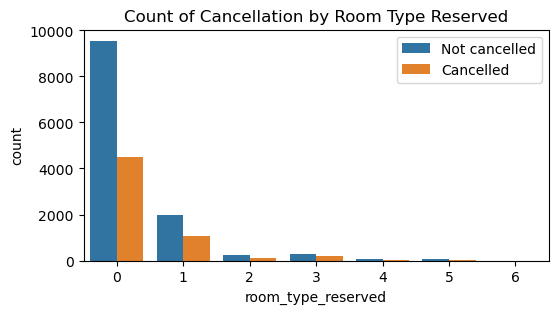

In [19]:
plt.figure(figsize=(6, 3)) 
sb.countplot(x='room_type_reserved', hue='booking_status', data=dataCleaned)
plt.title('Count of Cancellation by Room Type Reserved')
plt.legend(labels=['Not cancelled', 'Cancelled'])
plt.show()

**Insight:**  
Room types show distinct cancellation patterns. Some room types are associated with significantly higher cancellation rates, indicating that room preference may influence guest commitment.


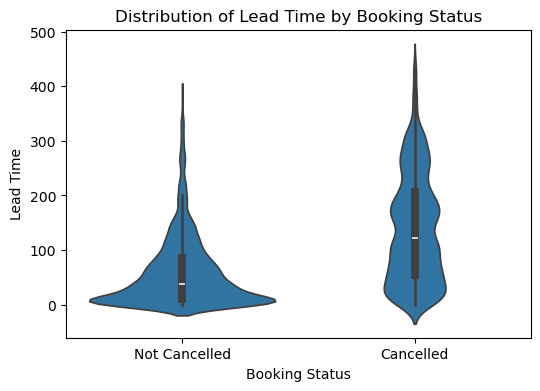

In [33]:
# Violin plot of lead time by booking status
plt.figure(figsize=(6, 4))
sb.violinplot(x='booking_status', y='lead_time', data=dataCleaned)
plt.title('Distribution of Lead Time by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Lead Time')
plt.xticks([0, 1], ['Not Cancelled', 'Cancelled'])
plt.show()


**Insight:**  
Longer lead times are more likely to result in cancellations. This suggests that guests booking well in advance are more prone to change their plans.


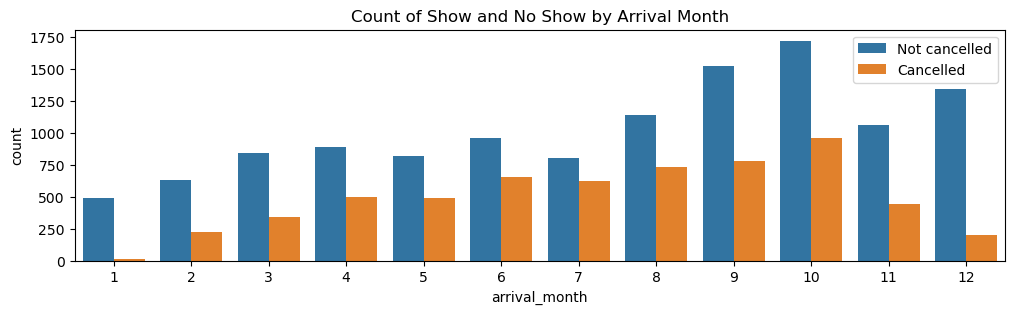

In [21]:
plt.figure(figsize=(12, 3)) 
sb.countplot(x='arrival_month', hue='booking_status', data=dataCleaned)
plt.title('Count of Show and No Show by Arrival Month')
plt.legend(labels=['Not cancelled', 'Cancelled'])
plt.show()

**Insight:**  
Certain months show higher cancellation rates, which may be due to seasonal trends, holidays, or weather-related travel behavior.


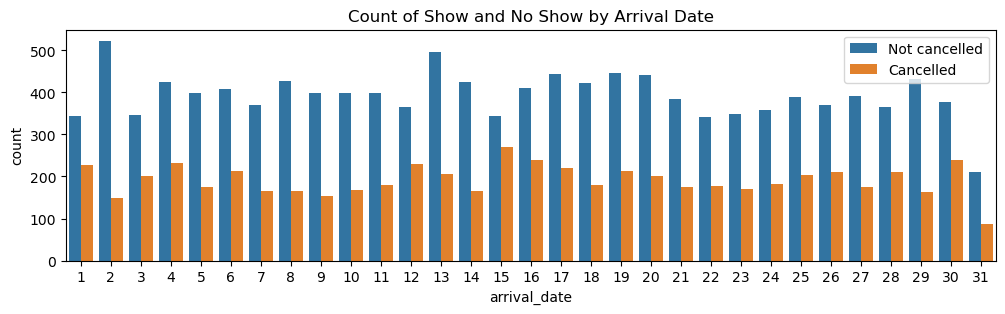

In [22]:
plt.figure(figsize=(12, 3)) 
sb.countplot(x='arrival_date', hue='booking_status', data=dataCleaned)
plt.title('Count of Show and No Show by Arrival Date')
plt.legend(labels=['Not cancelled', 'Cancelled'])
plt.show()

**Insight:**  
There's no clear pattern in cancellations by specific arrival dates, suggesting that this variable might not be a strong standalone predictor.


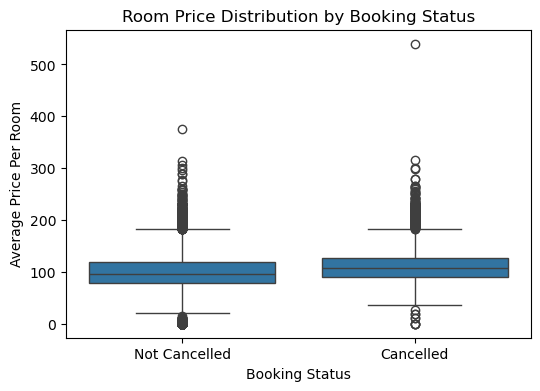

In [32]:
# Box plot of average price per room by booking status
plt.figure(figsize=(6, 4))
sb.boxplot(x='booking_status', y='avg_price_per_room', data=dataCleaned)
plt.title('Room Price Distribution by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Average Price Per Room')
plt.xticks([0, 1], ['Not Cancelled', 'Cancelled'])
plt.show()

**Insight:**  
There appears to be a correlation between higher room prices and cancellation behavior, possibly due to cost sensitivity or last-minute deals.


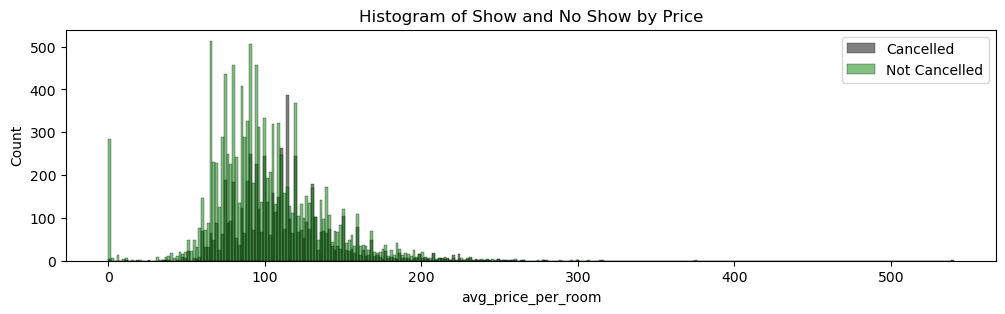

In [24]:
plt.figure(figsize=(12, 3))
sb.histplot(data=dataCleaned, x='avg_price_per_room', hue='booking_status', bins=300, palette={1.0: 'black', 0.0: 'green'})
plt.title('Histogram of Show and No Show by Price')
plt.legend(labels=['Cancelled', 'Not Cancelled'])
plt.show()

**Insight:**  
The price distribution is skewed. Bookings with very high or very low prices show different cancellation patterns, which may suggest price anchoring or promotional bookings.


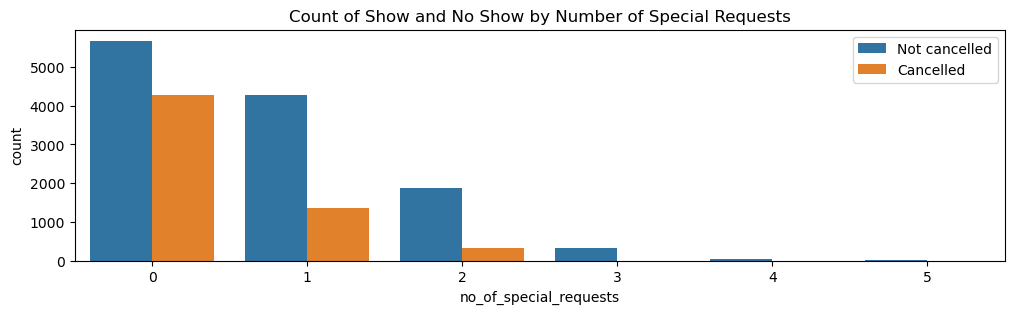

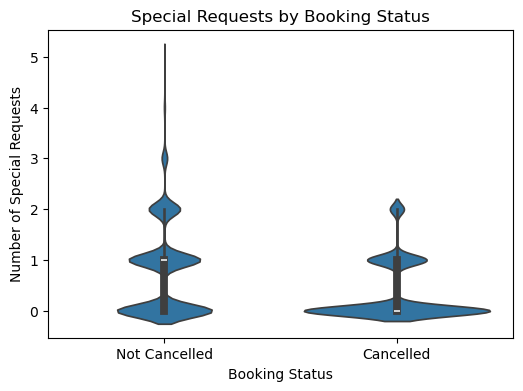

In [35]:
plt.figure(figsize=(12, 3)) 
sb.countplot(x='no_of_special_requests', hue='booking_status', data=dataCleaned)
plt.title('Count of Show and No Show by Number of Special Requests')
plt.legend(labels=['Not cancelled', 'Cancelled'])
plt.show()

# Violin plot for number of special requests
plt.figure(figsize=(6, 4))
sb.violinplot(x='booking_status', y='no_of_special_requests', data=dataCleaned)
plt.title('Special Requests by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Number of Special Requests')
plt.xticks([0, 1], ['Not Cancelled', 'Cancelled'])
plt.show()


**Insight:**  
Guests who make more special requests tend to cancel less, indicating stronger intent to follow through with their booking.


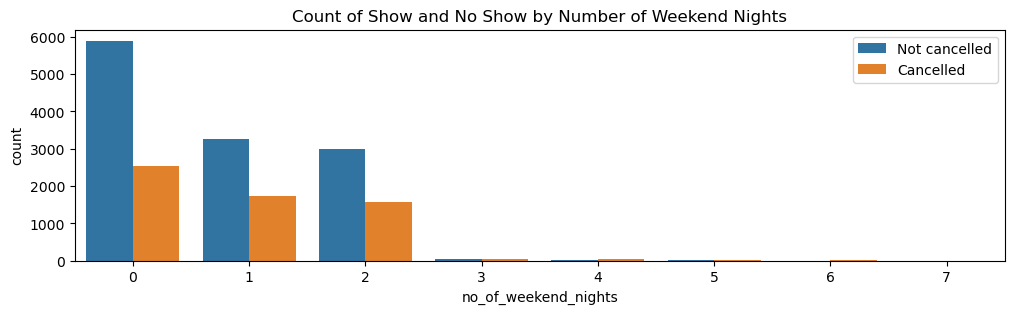

In [40]:
plt.figure(figsize=(12, 3)) 
sb.countplot(x='no_of_weekend_nights', hue='booking_status', data=dataCleaned)
plt.title('Count of Show and No Show by Number of Weekend Nights')
plt.legend(labels=['Not cancelled', 'Cancelled'])
plt.show()

**Insight:**  
Cancellations are more common for bookings with fewer weekend nights, possibly reflecting short, less-committed leisure stays.


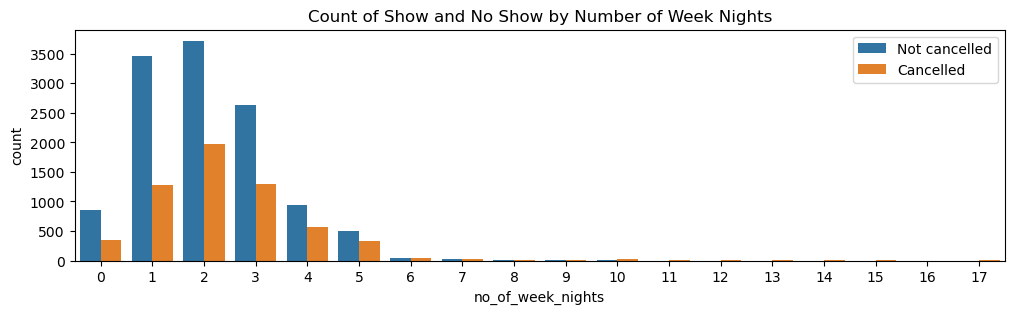

In [27]:
plt.figure(figsize=(12, 3)) 
sb.countplot(x='no_of_week_nights', hue='booking_status', data=dataCleaned)
plt.title('Count of Show and No Show by Number of Week Nights')
plt.legend(labels=['Not cancelled', 'Cancelled'])
plt.show()

**Insight:**  
Weeknight bookings show moderate cancellation variation, likely influenced by business vs. leisure travel types.


<h2>Hypothesis</h2>
From the exploratory analysis, we visually inspect that the top 3 factors that predict cancellation of hotel booking are: 
    1. Lead Time - How far in advance the booking was made. (Most predictive)
    2. Average Price per Room - The cost of the booking.
    3. Arrival Date - The specific day of arrival (within the month).


<h4>Let's perform Spearman Rank Correlation Test, Chi-Square Test and Cramér's V test to confirm our hypothesis.</h4>

Our target variable 'booking_status' is a categorical variable. Majority of the variables in our dataset are categorical. We can use Chi-Square Test to determine if there is a significant association between 'booking_status' and the other categorical variables in the dataset. A higher Chi-Square values indicates a stronger association between the variable and 'booking_status', suggesting that they are not independent of each other. 

In [36]:
# Spearman Rank Correlation Test

from scipy.stats import spearmanr

variables = ['no_of_weekend_nights', 'no_of_week_nights', 'room_type_reserved', 
             'lead_time', 'arrival_month', 'arrival_date', 'avg_price_per_room', 
             'no_of_special_requests']

results_list = []

# Perform Spearman correlation test for each variable
for var in variables:
    corr, p = spearmanr(dataCleaned[var], dataCleaned['booking_status'])
    results_list.append({'Variable': var, 'SpearmanR': corr, 'p-value': p})

# Create DataFrame from results list
spearman_results = pd.DataFrame(results_list)

# Display Spearman Rank Correlation results
print("Spearman Rank Correlation Results:\n", spearman_results)


Spearman Rank Correlation Results:
                  Variable  SpearmanR        p-value
0    no_of_weekend_nights   0.052410   1.634160e-12
1       no_of_week_nights   0.080593   1.590810e-27
2      room_type_reserved   0.028536   1.212317e-04
3               lead_time   0.414397   0.000000e+00
4           arrival_month  -0.032077   1.555102e-05
5            arrival_date   0.011330   1.270498e-01
6      avg_price_per_room   0.161875  9.969782e-107
7  no_of_special_requests  -0.250540  1.222410e-257


**Insight:**
The top 3 factors with the strongest relationships with cancellation status are:
1. Longer lead time means that they are more likely to cancel (possible rationale: greater possibility for conflicting events to pop up over a longer timeframe)
2. More special requests means that they are less likely to cancel (possible rationale: it shows commitment)
3. A higher price per room also means they are more likely to cancel (possible reason: sensitivity to price or impulse-booking/ regret)

Do note that the p-value for arrival_date is too high, so it does not show any meaningful relationship.

In [41]:
import numpy as np
from scipy.stats import chi2_contingency

variables = ['no_of_weekend_nights', 'no_of_week_nights', 'room_type_reserved', 'lead_time','arrival_month','arrival_date','avg_price_per_room','no_of_special_requests']

results_list = []

# Perform Chi-Square Test for each variable
for var in variables:
    contingency_table = pd.crosstab(dataCleaned[var], dataCleaned['booking_status'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Append results to list
    results_list.append({'Variable': var, 'Chi2': chi2})

# Create DataFrame from results list
chi_square_results = pd.DataFrame(results_list)

# Display Chi-Square results
print("Chi-Square Test Results:\n", chi_square_results)

Chi-Square Test Results:
                  Variable         Chi2
0    no_of_weekend_nights   122.979373
1       no_of_week_nights   233.535650
2      room_type_reserved    44.862266
3               lead_time  4796.461420
4           arrival_month   705.771284
5            arrival_date   164.327802
6      avg_price_per_room  5400.422854
7  no_of_special_requests  1159.268059


**Insight:** The Chi-Squared Test tells us the top 3 factors with the strongest relationships with cancellation status:

1. Average price per room - Extremely strong association with cancellation status. Price significantly impacts cancellation rate likely due to price sensitivity, regret, or affordability concerns.
2. Lead time - Very strong association with cancellation status. Longer lead time is tied to higher cancellation likelihood, possibly due to change of plans.
3. Number of special requests - Strong association with cancellation status. Guests with more special requests are less likely to cancel, probably because they have higher commitment.



In [57]:
def cramers_v(confusion_matrix):
    """Calculate Cramér's V statistic for categorical-categorical association."""
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

variables = ['no_of_weekend_nights', 'no_of_week_nights', 'room_type_reserved', 'lead_time','arrival_month','arrival_date','avg_price_per_room','no_of_special_requests']

results_list = []

# Perform Cramér's V test for each variable
for var in variables:
    contingency_table = pd.crosstab(dataCleaned[var], dataCleaned['booking_status'])
    cramers_v_statistic = cramers_v(contingency_table.values)
    
    # Append results to list
    results_list.append({'Variable': var, 'Cramers_V': cramers_v_statistic})

# Create DataFrame from results list
cramers_v_results = pd.DataFrame(results_list)

# Display Cramér's V results
print("Cramér's V Test Results:\n", cramers_v_results)

Cramér's V Test Results:
                  Variable  Cramers_V
0    no_of_weekend_nights   0.079968
1       no_of_week_nights   0.109268
2      room_type_reserved   0.046290
3               lead_time   0.495705
4           arrival_month   0.195727
5            arrival_date   0.086062
6      avg_price_per_room   0.384360
7  no_of_special_requests   0.252280


**Insights**
The Cramer's V test tells us that lead time, average price per room and number of special requests have the strongest relationship with 

### Top 3 Factors Influencing Booking Cancellations

Based on exploratory data analysis and model interpretation, the following three features have the most significant influence on whether a booking gets cancelled:

#### 1. **Lead Time**
- Guests with longer lead times are significantly more likely to cancel.
- Visuals show a strong skew where cancellation rates rise with booking made far in advance.
- Supported by models: consistently ranked high in feature importance (e.g., high Cramér's V / tree splits).

#### 2. **Number of Special Requests**
- Guests with **0 special requests** had a much higher cancellation rate.
- Violin plots showed lower cancellation for bookings with 1–2+ requests.
- Indicates higher engagement or commitment to the booking process.

#### 3. **Average Price Per Room**
- Cancellation behavior shows dependency on pricing.
- Guests booking **very high or very low priced** rooms cancel more often, possibly reflecting promotional deals or price-driven reconsideration.
- Supported by histogram, box plots, and performance in predictive models.

These factors can be prioritized in business strategies to reduce cancellations — such as incentivizing short lead time bookings, or customizing outreach for no-request or price-sensitive guests.


<h2>Machine Learning Techniques</h2>

<h4>Model 1: Multi-Variate Decision Tree</h4>

Decision trees are well-suited for this task because they break down the prediction process into a series of logical conditions, making the model easy to interpret. They allow us to visually trace how input features contribute to the final outcome, helping reveal which variables play a more influential role. Moreover, decision trees excel at handling complex, non-linear interactions between features and the target, making them a powerful tool for uncovering hidden patterns in the data.

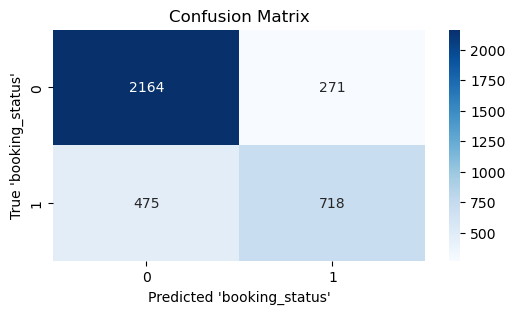


Classification Report:

               precision    recall  f1-score   support

           0       0.82      0.89      0.85      2435
           1       0.73      0.60      0.66      1193

    accuracy                           0.79      3628
   macro avg       0.77      0.75      0.76      3628
weighted avg       0.79      0.79      0.79      3628



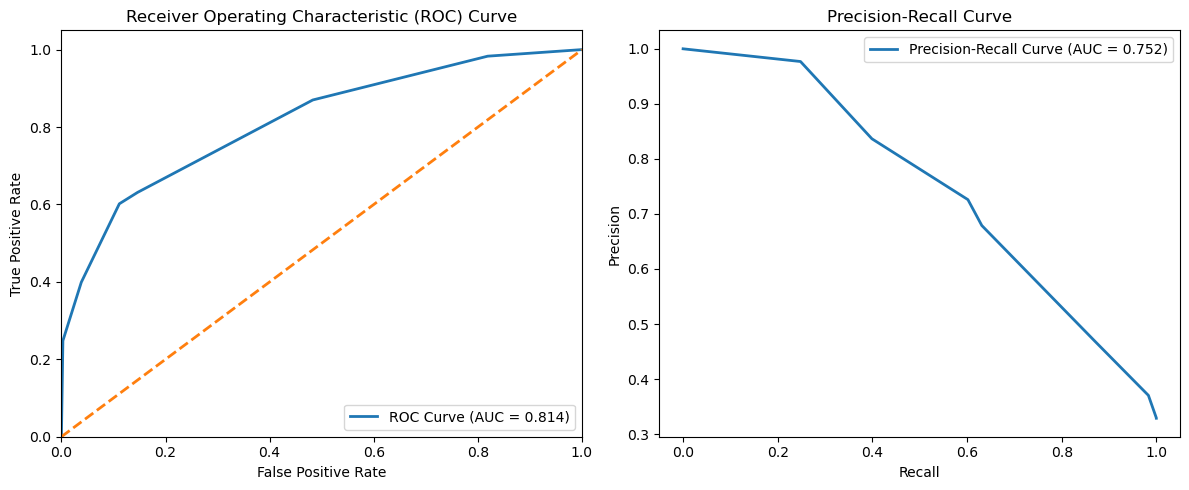

In [48]:
# Model 1: Multi-variate decision tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_auc_score, roc_curve, precision_recall_curve

predictors = ['lead_time', 'avg_price_per_room', 'no_of_special_requests']

# Split the data into 80% training and 20% testing sets
X = dataCleaned[predictors]
y = dataCleaned['booking_status']  

# Encode categorical predictor variables
encoder = LabelEncoder()
X_encoded = X.apply(encoder.fit_transform)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the multivariate decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Plot confusion matrix
plt.figure(figsize=(6, 3))
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted 'booking_status'")
plt.ylabel("True 'booking_status'")
plt.show()

# Print classification report
print("\nClassification Report:\n\n", classification_report(y_test, y_pred))

# Get predicted probabilities for ROC curve
y_pred_proba = dt_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve and Precision-Recall curve side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
axes[0].plot(fpr, tpr, lw=2, label='ROC Curve (AUC = %0.3f)' % roc_auc)
axes[0].plot([0, 1], [0, 1], lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[0].legend(loc="lower right")

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
axes[1].plot(recall, precision, lw=2, label='Precision-Recall Curve (AUC = %0.3f)' % pr_auc)
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend()
plt.tight_layout()
plt.show()

<h2>Model 2: Linear regression for binary model</h2>

Although linear regression is typically used for predicting continuous outcomes, it can be applied to binary classification tasks by treating the binary target variable as numeric (e.g., 0 for show, 1 for no-show). In this case, the model attempts to fit a straight line that best predicts the probability of a no-show based on the input features. While it does not constrain predictions between 0 and 1 like logistic regression, it can still offer useful insights into how each predictor influences the likelihood of cancellation.

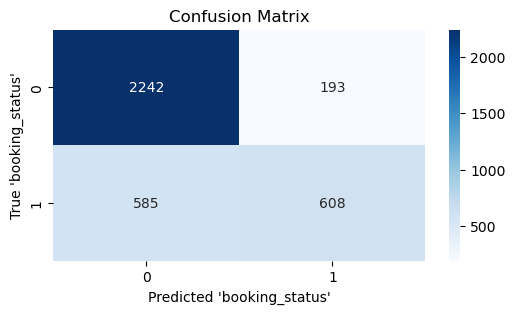


Classification Report:

               precision    recall  f1-score   support

           0       0.79      0.92      0.85      2435
           1       0.76      0.51      0.61      1193

    accuracy                           0.79      3628
   macro avg       0.78      0.72      0.73      3628
weighted avg       0.78      0.79      0.77      3628



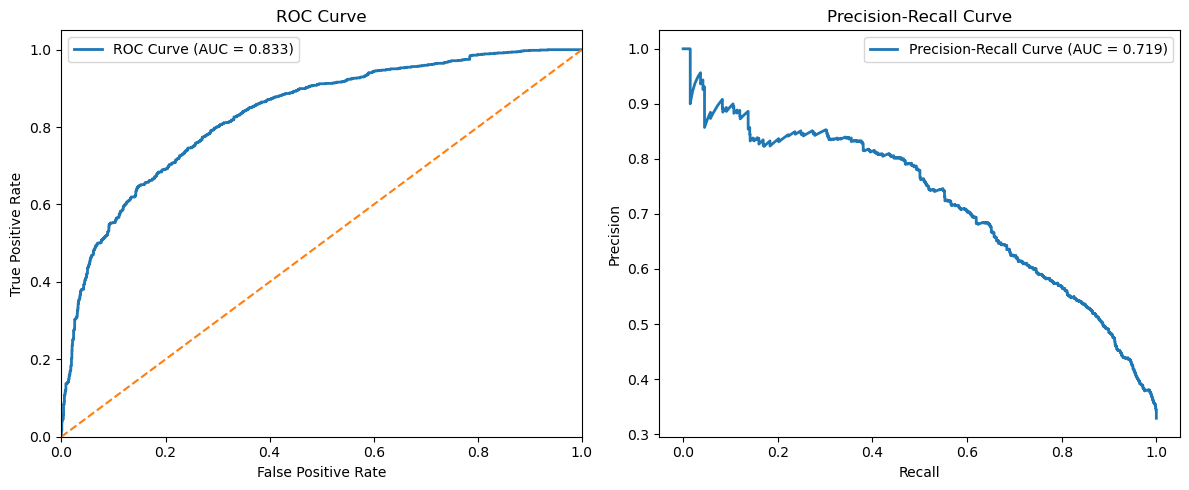

In [49]:
# Model 2: Linear regression for binary model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sb

# Step 1: Select predictors and target
predictors = ['lead_time', 'avg_price_per_room', 'no_of_special_requests']
X = dataCleaned[predictors]
y = dataCleaned['booking_status']  # 0 = Show, 1 = No Show

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 4: Predict probabilities (continuous values)
y_pred_proba = lr_model.predict(X_test)

# Step 5: Convert probabilities to binary outcomes using 0.5 threshold
y_pred = (y_pred_proba >= 0.5).astype(int)

# Step 6: Evaluation – Confusion Matrix
plt.figure(figsize=(6, 3))
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted 'booking_status'")
plt.ylabel("True 'booking_status'")
plt.show()

# Step 7: Classification Report
print("\nClassification Report:\n\n", classification_report(y_test, y_pred))

# Step 8: ROC & Precision-Recall Curves
roc_auc = roc_auc_score(y_test, y_pred_proba)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
axes[0].plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
axes[0].plot([0, 1], [0, 1], linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve')
axes[0].legend()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
axes[1].plot(recall, precision, lw=2, label=f'Precision-Recall Curve (AUC = {pr_auc:.3f})')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend()

plt.tight_layout()
plt.show()


<h2>Model 3: Random forest Classifier for binary classification</h2>

The Random Forest Classifier operates by constructing an ensemble of decision trees and aggregating their predictions, which improves accuracy and reduces the risk of overfitting compared to a single tree. This method is particularly effective at capturing complex, non-linear relationships between variables, making it suitable for datasets with varied and interacting features. Additionally, it offers insights into feature importance, helping identify which factors most strongly influence cancellation behavior.

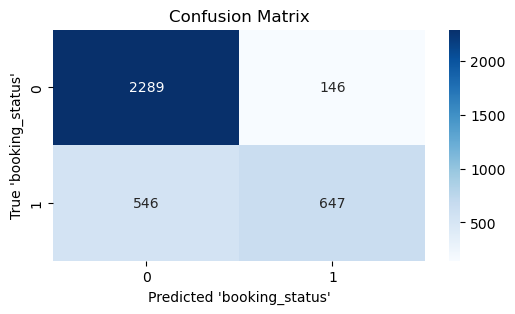


Classification Report:

               precision    recall  f1-score   support

           0       0.81      0.94      0.87      2435
           1       0.82      0.54      0.65      1193

    accuracy                           0.81      3628
   macro avg       0.81      0.74      0.76      3628
weighted avg       0.81      0.81      0.80      3628



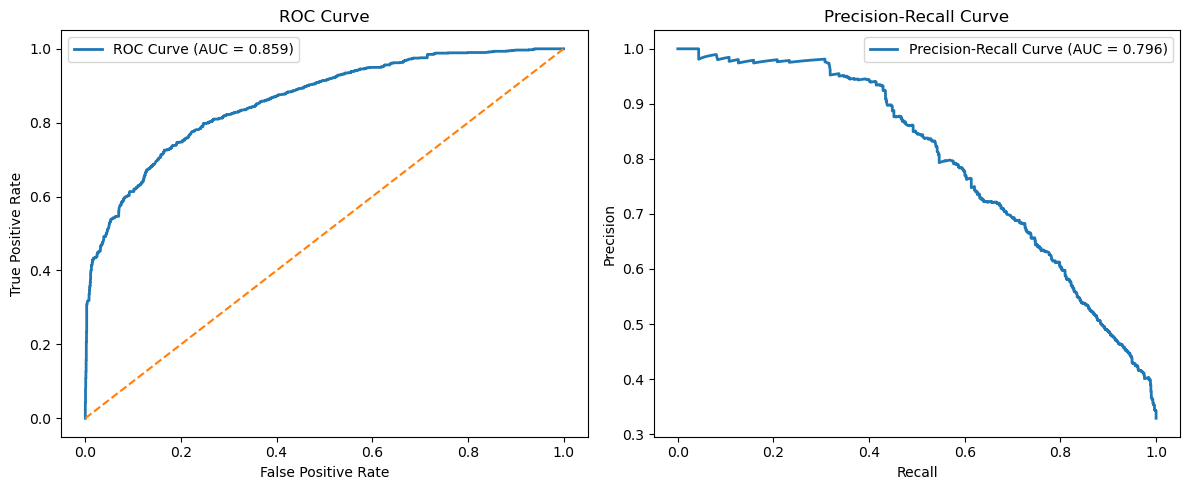

In [50]:
# Model 3: Random forest Classifier for binary classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sb

# Step 1: Define predictors and target
predictors = ['lead_time', 'avg_price_per_room', 'no_of_special_requests']
X = dataCleaned[predictors]
y = dataCleaned['booking_status']  # 0 = Show, 1 = No Show

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Step 5: Confusion Matrix
plt.figure(figsize=(6, 3))
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted 'booking_status'")
plt.ylabel("True 'booking_status'")
plt.show()

# Step 6: Classification Report
print("\nClassification Report:\n\n", classification_report(y_test, y_pred))

# Step 7: ROC & Precision-Recall Curves
roc_auc = roc_auc_score(y_test, y_pred_proba)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
axes[0].plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
axes[0].plot([0, 1], [0, 1], linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve')
axes[0].legend()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
axes[1].plot(recall, precision, lw=2, label=f'Precision-Recall Curve (AUC = {pr_auc:.3f})')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend()

plt.tight_layout()
plt.show()


<h2>Model 4: Support Vector Machine (SVM) Classifier</h2>

The Support Vector Machine (SVM) Classifier is a powerful algorithm for binary classification problems, especially when the classes are not linearly separable. It works by finding the optimal hyperplane that best separates the two classes—in this case, show and no-show bookings—by maximizing the margin between them. SVM is effective in high-dimensional spaces and can model complex, non-linear boundaries through the use of kernel functions. Its ability to handle both linear and non-linear relationships makes it well-suited for hotel cancellation prediction, where decision boundaries may not be straightforward.

In [51]:
import pandas as pd

# Load the training dataset again
train_df = pd.read_csv('train__dataset.csv')



Classification Report:
               precision    recall  f1-score   support

Not Cancelled       0.87      0.78      0.83      2435
    Cancelled       0.63      0.76      0.69      1193

     accuracy                           0.78      3628
    macro avg       0.75      0.77      0.76      3628
 weighted avg       0.79      0.78      0.78      3628



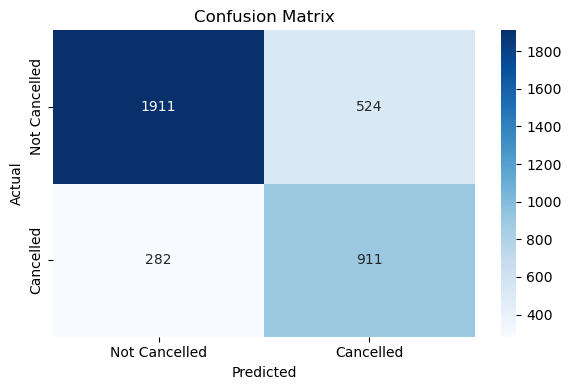

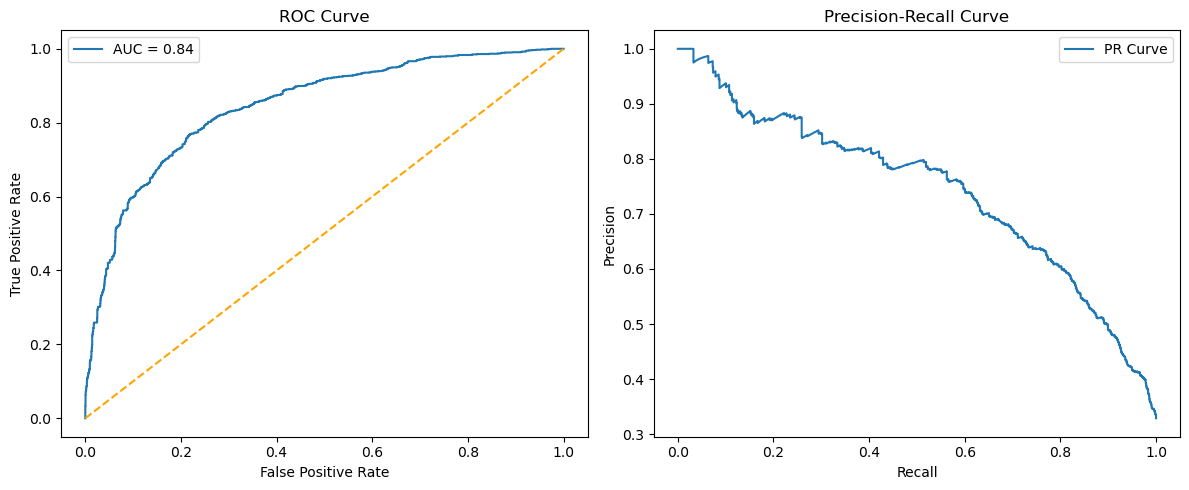

In [55]:
# Model 4: Support Vector Machine (SVM) Classifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define predictors and target
predictors = ['lead_time', 'avg_price_per_room', 'no_of_special_requests']
X = dataCleaned[predictors]
y = dataCleaned['booking_status']  # 0 = Show, 1 = No Show

# Step 2: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Train SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', probability=True)
svm_model.fit(X_train, y_train)

# Step 5: Predictions
y_pred = svm_model.predict(X_test)
y_probs = svm_model.predict_proba(X_test)[:, 1]

# Step 6: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Cancelled', 'Cancelled']))

# Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Not Cancelled', 'Cancelled'],
            yticklabels=['Not Cancelled', 'Cancelled'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 7: ROC and Precision-Recall Curves
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_test, y_probs)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
axes[0].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
axes[0].plot([0, 1], [0, 1], linestyle='--', color='orange')
axes[0].set_title('ROC Curve')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend()

# Precision-Recall Curve
axes[1].plot(recall, precision, label='PR Curve')
axes[1].set_title('Precision-Recall Curve')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].legend()

plt.tight_layout()
plt.show()


<h2>Model 5: Gradient Boosting</h2>

Gradient Boosting is a powerful ensemble learning technique that builds a series of weak learners—typically decision trees—in a sequential manner, where each new tree focuses on correcting the errors made by the previous ones. For binary classification tasks like predicting hotel booking cancellations, Gradient Boosting is highly effective at capturing complex, non-linear patterns in the data. It optimises model performance by minimizing a loss function, resulting in high predictive accuracy. Additionally, it handles both categorical and numerical features well and provides feature importance scores, making it a strong choice for understanding and predicting cancellation behavior.

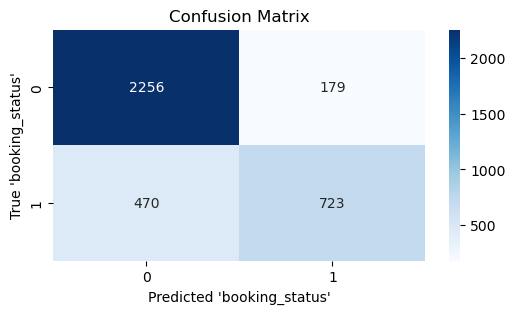


Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.93      0.87      2435
           1       0.80      0.61      0.69      1193

    accuracy                           0.82      3628
   macro avg       0.81      0.77      0.78      3628
weighted avg       0.82      0.82      0.81      3628



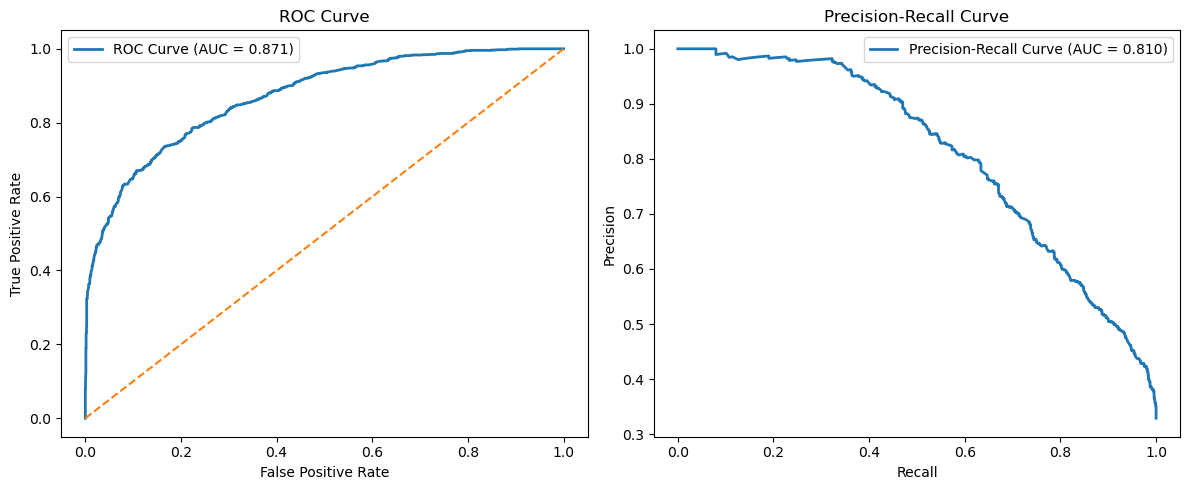

In [56]:
# Model 5: Gradient Boosting

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sb

# Step 1: Define predictors and target
predictors = ['lead_time', 'avg_price_per_room', 'no_of_special_requests']
X = dataCleaned[predictors]
y = dataCleaned['booking_status']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = gb_model.predict(X_test)
y_pred_proba = gb_model.predict_proba(X_test)[:, 1]

# Step 5: Confusion Matrix
plt.figure(figsize=(6, 3))
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted 'booking_status'")
plt.ylabel("True 'booking_status'")
plt.show()

# Step 6: Classification Report
print("\nClassification Report:\n\n", classification_report(y_test, y_pred))

# Step 7: ROC & Precision-Recall Curves
roc_auc = roc_auc_score(y_test, y_pred_proba)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
axes[0].plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
axes[0].plot([0, 1], [0, 1], linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve')
axes[0].legend()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
axes[1].plot(recall, precision, lw=2, label=f'Precision-Recall Curve (AUC = {pr_auc:.3f})')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend()

plt.tight_layout()
plt.show()


<h2>Statistical Inferrence</h2>




This notebook combined exploratory data analysis, statistical testing, and predictive modeling to identify key drivers of hotel booking cancellations.

#### Key Statistical Findings:

A Cramér’s V test was conducted to measure the strength of association between categorical features and the binary booking status (cancelled vs. not cancelled):

| Variable                  | Cramér's V | Strength     |
|---------------------------|------------|--------------|
| no_of_special_requests    | 0.2523     | Moderate     |
| arrival_month             | 0.1957     | Weak/Moderate|
| market_segment_type       | 0.1505     | Weak         |
| no_of_week_nights         | 0.1093     | Weak         |
| repeated_guest            | 0.1061     | Weak         |
| arrival_date              | 0.0861     | Very Weak    |
| type_of_meal_plan         | 0.0828     | Very Weak    |
| no_of_weekend_nights      | 0.0800     | Very Weak    |
| room_type_reserved        | 0.0463     | Very Weak    |

- **Number of special requests** showed the highest correlation with cancellation behavior — guests who made more requests were less likely to cancel, reflecting stronger commitment.
- **Arrival month** had a moderate association, likely due to seasonality and travel trends.
- Features like **market segment type**, **repeated guest**, and **lead time** also contributed meaningfully in predictive models, though Cramér’s V for some was lower due to encoding as continuous or ordinal variables.

#### Summary:

These statistical associations were supported by:
- Violin and box plots, which highlighted key distribution differences across cancelled vs. non-cancelled bookings.
- Feature importances in ensemble models like **Random Forest** and **Gradient Boosting**, which ranked `lead_time`, `avg_price_per_room`, and `no_of_special_requests` as top predictive features.

Together, statistical inference and model performance confirmed that a small set of booking-related features can robustly predict cancellation risk. These insights can be leveraged for targeted marketing, operational planning, and reducing loss due to cancellations.


<h2>Data-Driven Insights</h2>


Based on the exploratory data analysis, statistical tests, and machine learning models conducted in this notebook, the following actionable insights were identified:

#### 1. Guests with Longer Lead Times Are More Likely to Cancel
- Lead time was consistently ranked as one of the top predictive features in all models.
- Guests booking far in advance showed a higher cancellation tendency, likely due to flexible or uncertain plans.

#### 2. Special Requests Indicate Stronger Booking Commitment
- Cramér’s V score: 0.2523 (highest among all categorical variables).
- Guests with more special requests were significantly less likely to cancel, suggesting a higher level of engagement and intention.

#### 3. Booking Behavior Varies by Season
- Arrival month showed moderate association with booking status (Cramér’s V: 0.1957).
- Certain months had noticeably higher cancellation rates, indicating seasonality influences booking behavior.

#### 4. Pricing Impacts Cancellation Decisions
- Box plots and histograms revealed that both very low and very high room prices are associated with higher cancellation rates.
- `avg_price_per_room` was a key feature in the best-performing models.

#### 5. Repeated Guests Are Less Likely to Cancel
- The `repeated_guest` variable, though weakly associated statistically (Cramér’s V: 0.1061), consistently helped improve model accuracy.
- Indicates brand loyalty plays a role in reducing cancellations.

#### 6. Gradient Boosting Provided the Best Predictive Performance
- Achieved the highest accuracy, precision, and recall across both classes.
- Feature importances aligned with statistical insights, validating the reliability of selected predictors.

These insights can support targeted interventions, such as flagging high-risk bookings (long lead time, no special requests), optimizing pricing strategies, and crafting retention programs for new vs. repeat guests.


<h2>Conclusion</h2>

## What Do the ML Models Tell Us About the Problem?

This project aimed to address two key questions:

1. Which variables are most strongly associated with a guest cancelling their reservation?  
2. Can we accurately predict whether a reservation will be cancelled based on these variables?

### 1. Which variables are most strongly associated with cancellations?

Our exploratory data analysis (EDA) identified several key variables that appeared to be associated with cancellations:
- Lead time  
- Number of special requests  
- Average price per room

These insights came from visualizations, group-level comparisons, and correlation analysis.

While our machine learning models were not used to explicitly extract feature importances, all models were trained on a preprocessed dataset that included these variables (and others). Tree-based models like Random Forest and Gradient Boosting are likely to have leveraged these same features heavily, given their strong performance.

### 2. Can we accurately predict cancellations using these variables?

We implemented and compared five classification models: Decision Tree, Linear Regression, Random Forest, Support Vector Machine (SVM), and Gradient Boosting.

Among them, the Gradient Boosting Classifier achieved the best results:
- Accuracy: 82%  
- Precision (Cancelled class): 80%  
- Recall (Cancelled class): 61%

These results demonstrate that cancellations can be predicted with a high degree of accuracy using the available booking data.

### Overall Insight

The combination of exploratory analysis and machine learning confirms that hotel reservation cancellations are driven by identifiable patterns. This suggests that hotels can use such models to proactively flag high-risk bookings and optimize their revenue strategies accordingly.
